# Importing modules and loading mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Example of mnist dataset

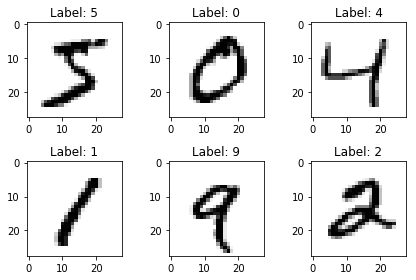

In [2]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.title("Label: {}".format(y_train[i]))
    
plt.show()

# Normalizing the data

In [3]:
x_train_n = tf.keras.utils.normalize(x_train, axis=1)
x_test_n = tf.keras.utils.normalize(x_test, axis=1)

# Creating model and training

In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

model.fit(x_train_n, y_train, epochs=4)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/4
60000/60000 [==============================] - 10s 173us/sample - loss: 0.2683 - acc: 0.9194
Epoch 2/4
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1103 - acc: 0.9663
Epoch 3/4
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0759 - acc: 0.9767
Epoch 4/4
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0578 - acc: 0.9809


# Calculating validation loss and accuracy

In [5]:
loss, accuracy = model.evaluate(x_test_n, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.1008 - acc: 0.9691


# Predictions example

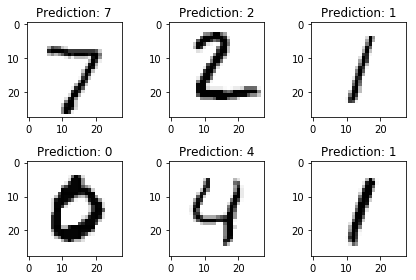

In [6]:
predictions = model.predict_on_batch([x_test])
    
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.title("Prediction: {}".format(np.argmax(predictions[i])))
    
plt.show()